In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import glob

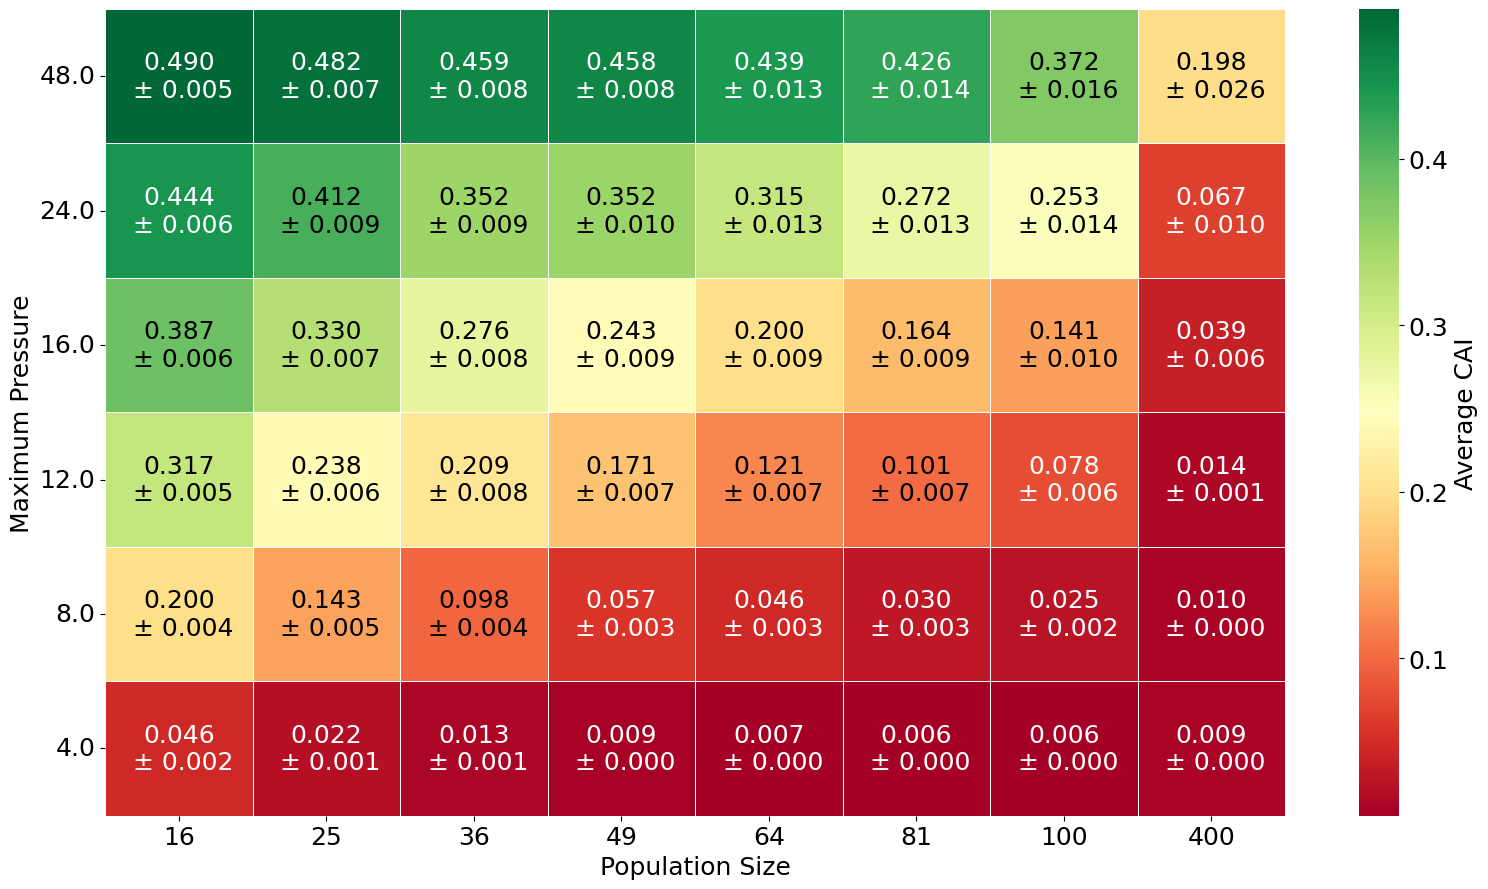

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem

# Load the CSV file
file_path = 'diff_pops_pressures/diff_pops_pressures.csv'
df = pd.read_csv(file_path)
df['popsize'] = df['num_cooperators'] + df['num_defectors'] + df['num_neutral']
df['max_pressure'] = df['max_positive_pressure'] + df['max_negative_pressure']

fontsize = 18

# Filter the dataframe to only include specified y-axis values
filtered_df_corrected = df

# Recalculate the grouped dataframe to include mean and SEM of CAI values
grouped_df_corrected = filtered_df_corrected.groupby(['max_pressure', 'popsize']).agg(
    avg_cai=('cai', 'mean'),
    sem_cai=('cai', sem)
).reset_index()

# Create the pivot table for the heatmap
pivot_table_avg_corrected = grouped_df_corrected.pivot(index='max_pressure', columns='popsize', values='avg_cai')
pivot_table_sem_corrected = grouped_df_corrected.pivot(index='max_pressure', columns='popsize', values='sem_cai')

# Convert max_positive_pressure to strings of integers for the x-axis
pivot_table_avg_corrected.columns = pivot_table_avg_corrected.columns.astype(int).astype(str)
pivot_table_sem_corrected.columns = pivot_table_sem_corrected.columns.astype(int).astype(str)

# Function to determine text color based on background color
def get_text_color(value, cmap):
    norm = plt.Normalize(vmin=pivot_table_avg_corrected.min().min(), vmax=pivot_table_avg_corrected.max().max())
    rgb = cmap(norm(value))
    brightness = 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]
    return 'black' if brightness > 0.5 else 'white'

# Plot the heatmap with all font sizes set to 18
plt.figure(figsize=(16, 9))
cmap = sns.color_palette("RdYlGn", as_cmap=True)
heatmap = sns.heatmap(pivot_table_avg_corrected, cmap=cmap, cbar_kws={'label': 'Average CAI'}, annot=False, linewidths=.5)

# Annotate each cell with the mean ± SEM of CAI values
for i in range(pivot_table_avg_corrected.shape[0]):
    for j in range(pivot_table_avg_corrected.shape[1]):
        mean_value = pivot_table_avg_corrected.iloc[i, j]
        sem_value = pivot_table_sem_corrected.iloc[i, j]
        if not pd.isna(mean_value) and not pd.isna(sem_value):
            text_color = get_text_color(mean_value, cmap)
            plt.text(j + 0.5, i + 0.5, f"{mean_value:.3f}\n ± {sem_value:.3f}", ha='center', va='center', color=text_color, fontsize=fontsize)

# Customize the axes and color bar font size
heatmap.set_xlabel('Population Size', fontsize=fontsize)
heatmap.set_ylabel('Maximum Pressure', fontsize=fontsize)
heatmap.figure.axes[-1].yaxis.label.set_size(fontsize)  # Color bar label
heatmap.figure.axes[-1].tick_params(labelsize=fontsize)  # Color bar ticks
plt.xticks(rotation=0, fontsize=fontsize)
plt.yticks(rotation=0, ha='right', va='center', fontsize=fontsize)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('diff_popsize_pressure.pdf')
plt.show()


## With Network

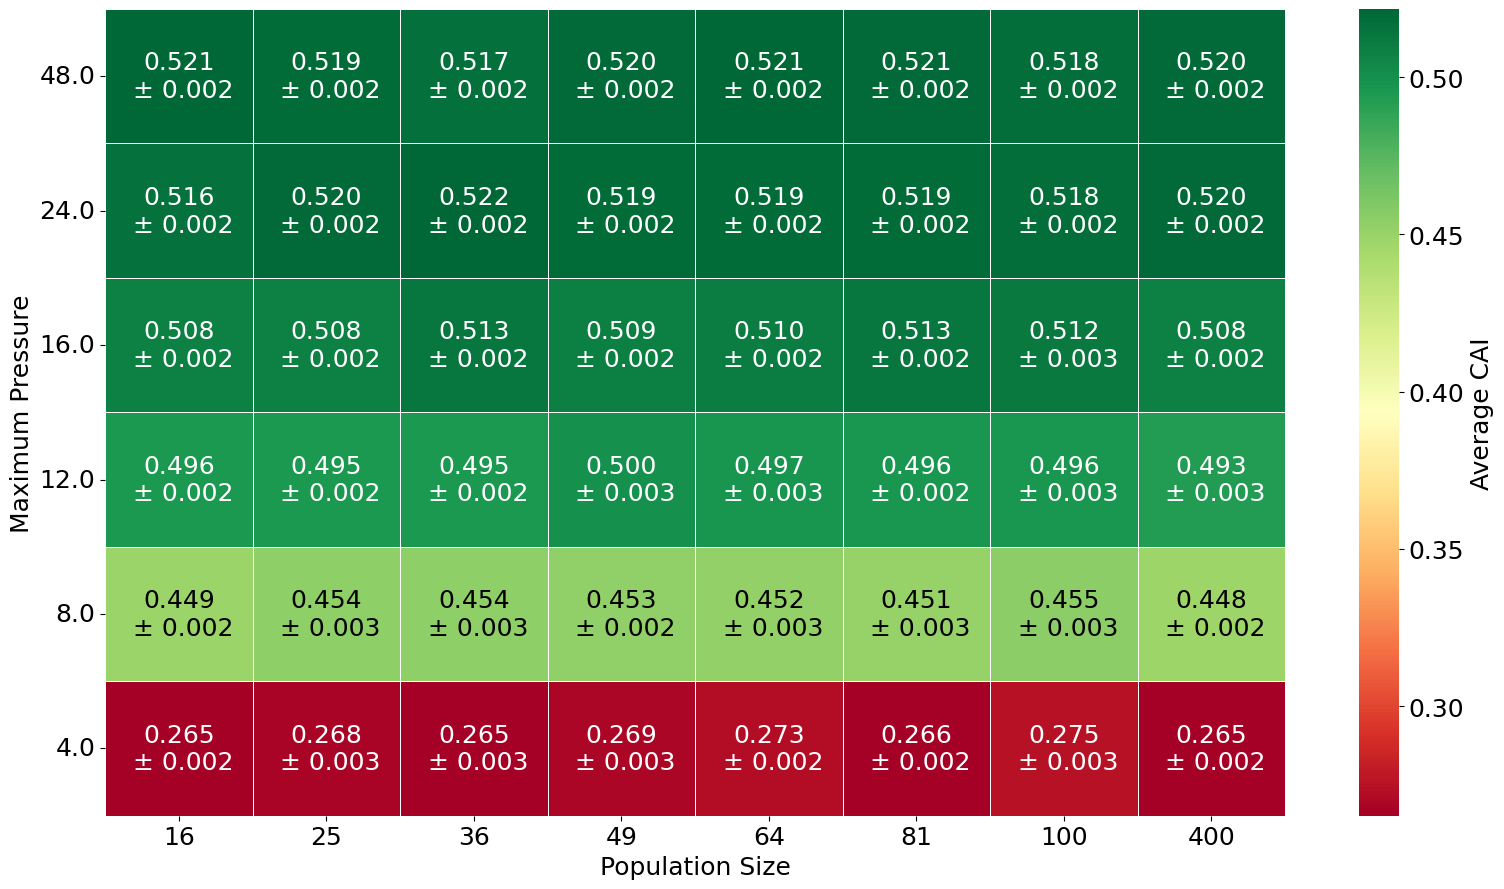

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem

# Load the CSV file (replace 'your_file.csv' with the actual file path)
df = pd.read_csv('diff_pops_pressures_network/diff_pops_pressures_network.csv')

# drop the rows with max_pressure = 96
df['max_pressure'] = df['max_positive_pressure'] + df['max_negative_pressure']
df = df[df['max_pressure'] != 96.0]

fontsize = 18
# Convert specified y-axis values to match the format in the dataset
#specified_y_values_corrected = [0, 2, 4, 6, 8, 12, 24]

# Filter the dataframe to only include specified y-axis values
filtered_df_corrected = df#df[df['max_negative_pressure'].isin(specified_y_values_corrected)]


# Recalculate the grouped dataframe to include mean and SEM of CAI values
grouped_df_corrected = filtered_df_corrected.groupby(['max_pressure', 'numagents']).agg(
    avg_cai=('cai', 'mean'),
    sem_cai=('cai', sem)
).reset_index()

# Create the pivot table for the heatmap
pivot_table_avg_corrected = grouped_df_corrected.pivot(index='max_pressure', columns='numagents', values='avg_cai')
pivot_table_sem_corrected = grouped_df_corrected.pivot(index='max_pressure', columns='numagents', values='sem_cai')

# Ensure all specified y-axis values are included in the pivot tables
#pivot_table_avg_corrected = pivot_table_avg_corrected.reindex(specified_y_values_corrected)
#pivot_table_sem_corrected = pivot_table_sem_corrected.reindex(specified_y_values_corrected)

# Convert max_positive_pressure to strings of integers for the x-axis
pivot_table_avg_corrected.columns = pivot_table_avg_corrected.columns.astype(int).astype(str)
pivot_table_sem_corrected.columns = pivot_table_sem_corrected.columns.astype(int).astype(str)

# Function to determine text color based on background color
def get_text_color(value, cmap):
    norm = plt.Normalize(vmin=pivot_table_avg_corrected.min().min(), vmax=pivot_table_avg_corrected.max().max())
    rgb = cmap(norm(value))
    # Calculate perceived brightness
    brightness = 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]
    return 'black' if brightness > 0.5 else 'white'

# Plot the heatmap with all font sizes set to 18
plt.figure(figsize=(16, 9))
cmap = sns.color_palette("RdYlGn", as_cmap=True)
heatmap=sns.heatmap(pivot_table_avg_corrected, cmap=cmap, cbar_kws={'label': 'Average CAI'}, annot=False, linewidths=.5)

# Annotate each cell with the mean ± SEM of CAI values
for i in range(pivot_table_avg_corrected.shape[0]):
    for j in range(pivot_table_avg_corrected.shape[1]):
        mean_value = pivot_table_avg_corrected.iloc[i, j]
        sem_value = pivot_table_sem_corrected.iloc[i, j]
        if not pd.isna(mean_value) and not pd.isna(sem_value):
            text_color = get_text_color(mean_value, cmap)
            plt.text(j + 0.5, i + 0.5, f"{mean_value:.3f}\n ± {sem_value:.3f}", ha='center', va='center', color=text_color, fontsize=fontsize)

plt.xlabel('Population Size', fontsize=fontsize)
plt.ylabel('Maximum Pressure', fontsize=fontsize)
plt.title('', fontsize=fontsize)
plt.xticks(rotation=0, fontsize=fontsize)
plt.yticks(rotation=0, ha='right', va='center', fontsize=fontsize)
heatmap.figure.axes[-1].yaxis.label.set_size(fontsize)  # Color bar label
heatmap.figure.axes[-1].tick_params(labelsize=fontsize)  # Color bar ticks

plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('different_pop_sizes_pressures_local_local.pdf')
plt.show()
